<a href="https://colab.research.google.com/github/ShakirJ25/QNC-Exercises/blob/main/Multiple_Comparisons_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Equal means (null true) ===
Raw significant tests (p<0.05): 41
Bonferroni significant: 0
BH-FDR significant: 0



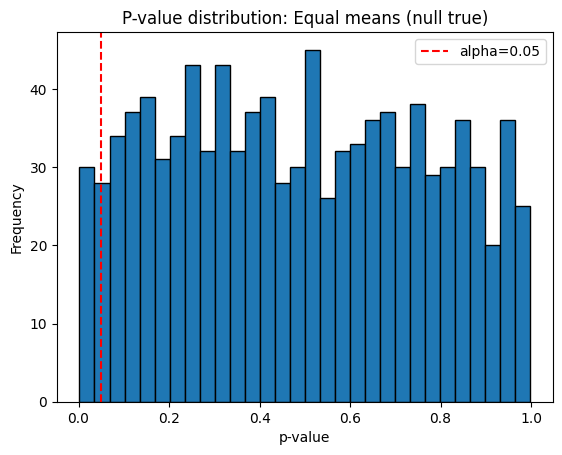

=== Different means (1 vs 2) ===
Raw significant tests (p<0.05): 964
Bonferroni significant: 344
BH-FDR significant: 964



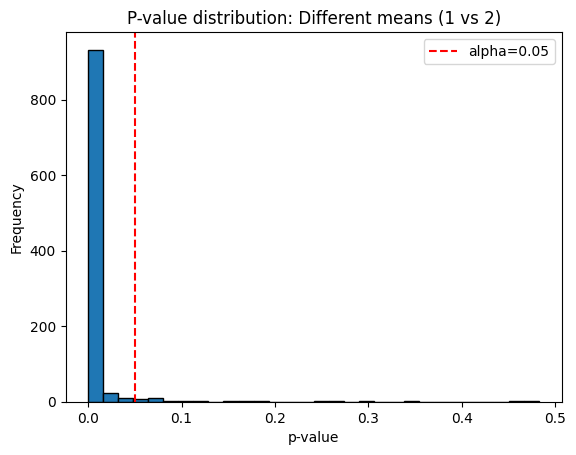

=== Larger difference (1 vs 3) ===
Raw significant tests (p<0.05): 1000
Bonferroni significant: 997
BH-FDR significant: 1000



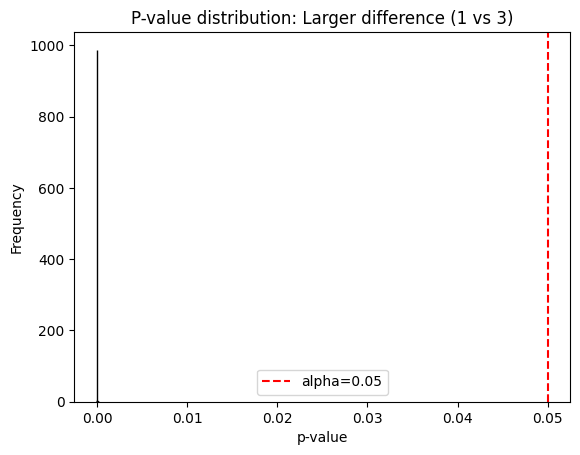

In [1]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Parameters
n_tests = 1000
n_per_group = 30
alpha = 0.05

# Helper function to run simulations and plot p-values
def run_simulation(mean1, mean2, title):
    p_values = []
    for _ in range(n_tests):
        group1 = np.random.normal(loc=mean1, scale=1, size=n_per_group)
        group2 = np.random.normal(loc=mean2, scale=1, size=n_per_group)
        _, pval = stats.ttest_ind(group1, group2)
        p_values.append(pval)
    p_values = np.array(p_values)

    bonf = multipletests(p_values, alpha=alpha, method='bonferroni')
    bh = multipletests(p_values, alpha=alpha, method='fdr_bh')

    print(f"=== {title} ===")
    print(f"Raw significant tests (p<0.05): {np.sum(p_values < 0.05)}")
    print(f"Bonferroni significant: {np.sum(bonf[0])}")
    print(f"BH-FDR significant: {np.sum(bh[0])}\n")

    # Plot histogram of p-values
    plt.hist(p_values, bins=30, edgecolor='black')
    plt.axvline(0.05, color='red', linestyle='--', label='alpha=0.05')
    plt.title(f"P-value distribution: {title}")
    plt.xlabel("p-value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# --- Case 1: Equal means ---
np.random.seed(42)
run_simulation(0, 0, "Equal means (null true)")

# --- Case 2: Different means (1 vs 2) ---
run_simulation(1, 2, "Different means (1 vs 2)")

# --- Case 3: Larger difference (1 vs 3) ---
run_simulation(1, 3, "Larger difference (1 vs 3)")
